# Analyse exploratoire des données issue de l'API d'Enedis

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [4]:
## Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Import du script pour recuperer les donnees
from scripts.int_api import get_data

df = get_data()

   consommation_profilee_ent_hta  soutirage_rte  temperature_reelle_lissee  \
0                      9842319.0   3.663986e+09                       10.3   
1                      9753744.0   3.508571e+09                       10.3   
2                     10097935.0   3.583818e+09                       10.3   
3                      9982813.0   3.555732e+09                       10.3   
4                     10188180.0   3.500023e+09                       10.3   

   consommation_telerelevee_btsup  consommation_telerelevee_residentielle  \
0                    3.837060e+09                             337762242.0   
1                    3.906590e+09                             341971621.0   
2                    3.947795e+09                             335499451.0   
3                    4.041599e+09                             340487958.0   
4                    4.050052e+09                             336589889.0   

   consommation_telerelevee_professionnelle  \
0                    

In [6]:
# Aperçu des données
df.head()

,consommation_profilee_ent_hta,soutirage_rte,temperature_reelle_lissee,consommation_telerelevee_btsup,consommation_telerelevee_residentielle,consommation_telerelevee_professionnelle,production_profilee_photovoltaique,pseudo_rayonnement,consommation_profilee_pro,production_photovoltaique,...,production_cogeneration,consommation_hta,production_telerelevee,injection_rte,horodate,production_totale,production_profilee,production_profilee_aut,consommation_totale,temperature_normale_lissee
0,9842319.0,3.663986e+09,10.3,3.837060e+09,337762242.0,13037945.0,35046.0,62,3.947912e+09,1928440.0,...,989877430.0,1.010819e+10,9.508071e+09,3.674132e+10,2025-03-28T22:45:00+00:00,9.511443e+09,3372466.0,1519595.0,3.914999e+10,0.0
1,9753744.0,3.508571e+09,10.3,3.906590e+09,341971621.0,13093172.0,31882.0,62,3.966919e+09,1966021.0,...,991393434.0,1.018816e+10,9.369338e+09,3.750912e+10,2025-03-28T22:30:00+00:00,9.372708e+09,3369302.0,1519595.0,3.985193e+10,9.6
2,10097935.0,3.583818e+09,10.3,3.947795e+09,335499451.0,13098268.0,29342.0,61,4.020695e+09,2091399.0,...,993430896.0,1.022499e+10,9.358892e+09,3.711432e+10,2025-03-28T22:15:00+00:00,9.362258e+09,3365869.0,1519595.0,3.944197e+10,0.0
3,9982813.0,3.555732e+09,10.3,4.041599e+09,340487958.0,13192752.0,36814.0,61,4.034090e+09,2159887.0,...,992977559.0,1.031350e+10,9.348450e+09,3.774551e+10,2025-03-28T22:00:00+00:00,9.351824e+09,3373341.0,1519595.0,4.002946e+10,9.6
4,10188180.0,3.500023e+09,10.3,4.050052e+09,336589889.0,12528562.0,57062.0,60,4.206722e+09,2200877.0,...,992589362.0,1.037750e+10,9.291646e+09,3.787243e+10,2025-03-28T21:45:00+00:00,9.295041e+09,3395747.0,1519595.0,4.015080e+10,0.0


In [7]:
# Info sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   consommation_profilee_ent_hta             400 non-null    float64
 1   soutirage_rte                             400 non-null    float64
 2   temperature_reelle_lissee                 400 non-null    float64
 3   consommation_telerelevee_btsup            400 non-null    float64
 4   consommation_telerelevee_residentielle    400 non-null    float64
 5   consommation_telerelevee_professionnelle  400 non-null    float64
 6   production_profilee_photovoltaique        400 non-null    float64
 7   pseudo_rayonnement                        400 non-null    int64  
 8   consommation_profilee_pro                 400 non-null    float64
 9   production_photovoltaique                 400 non-null    float64
 10  pertes                                

In [8]:
# Convertion des types de variables
df["horodate"] = pd.to_datetime(df["horodate"])
df["mois"] = df["mois"].astype(int)

## Statistiques descriptives

In [9]:
# Résumé statistique univariée
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consommation_profilee_ent_hta,400.0,1.112924e+07,1.613460e+06,9.101077e+06,9.803955e+06,1.046150e+07,1.244896e+07,1.446858e+07
soutirage_rte,400.0,2.077140e+09,1.383128e+09,7.286307e+08,9.942332e+08,1.431691e+09,2.957463e+09,6.135158e+09
temperature_reelle_lissee,400.0,1.087850e+01,7.366440e-01,9.600000e+00,1.030000e+01,1.070000e+01,1.150000e+01,1.290000e+01
consommation_telerelevee_btsup,400.0,5.108404e+09,1.186502e+09,3.605314e+09,3.991204e+09,4.969751e+09,6.195634e+09,7.344302e+09
consommation_telerelevee_residentielle,400.0,2.863359e+08,5.107641e+07,1.820531e+08,2.383908e+08,2.920632e+08,3.277559e+08,3.793347e+08
consommation_telerelevee_professionnelle,400.0,1.166632e+07,2.139814e+06,8.132642e+06,1.012253e+07,1.139811e+07,1.282121e+07,1.788487e+07
production_profilee_photovoltaique,400.0,4.055297e+08,5.617781e+08,1.002400e+04,4.654775e+04,2.879228e+06,8.485965e+08,1.830943e+09
pseudo_rayonnement,400.0,5.021500e+01,1.634094e+01,2.400000e+01,3.600000e+01,5.200000e+01,6.400000e+01,8.000000e+01
consommation_profilee_pro,400.0,4.415127e+09,5.841765e+08,3.451153e+09,3.866037e+09,4.560986e+09,4.820074e+09,5.515924e+09
production_photovoltaique,400.0,3.080521e+09,4.109689e+09,2.735130e+05,5.394848e+05,4.695740e+07,6.772576e+09,1.288167e+10


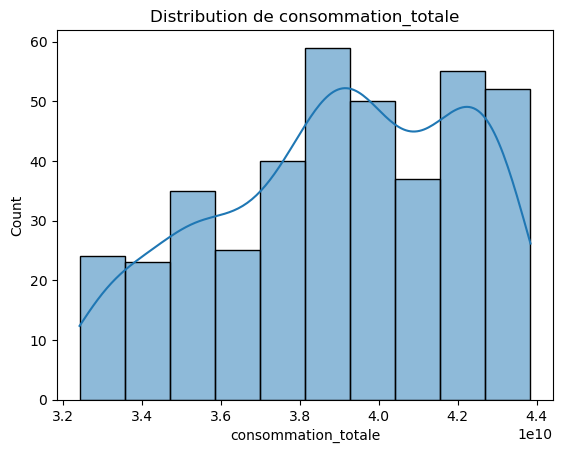

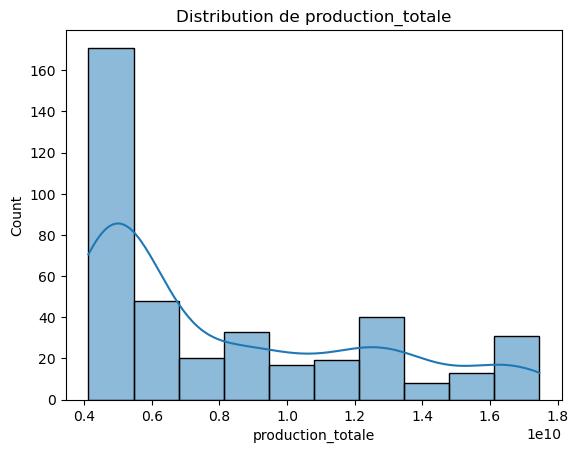

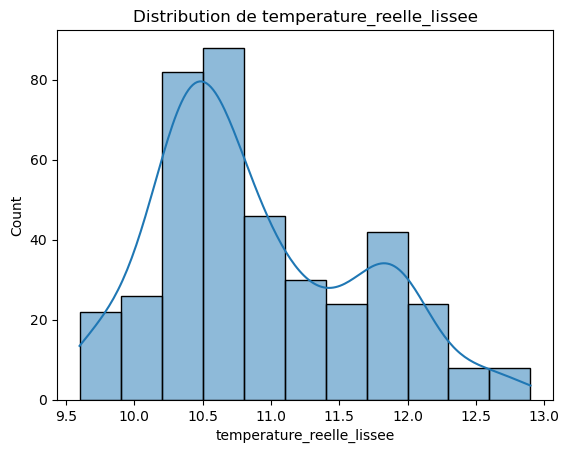

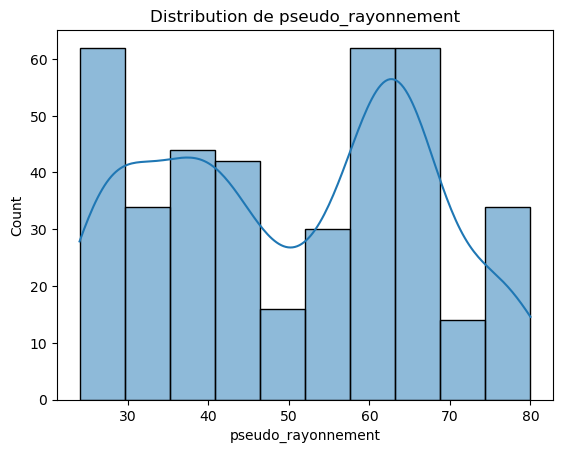

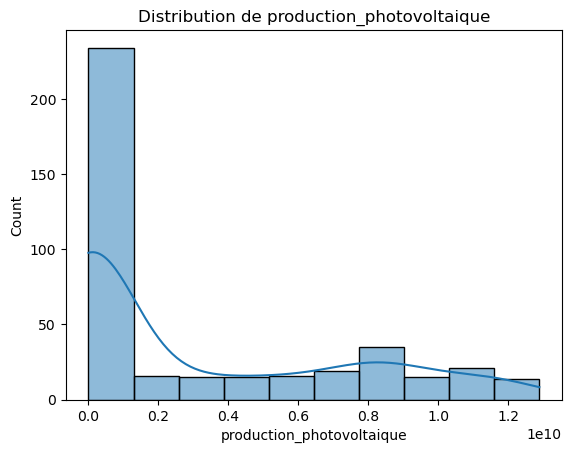

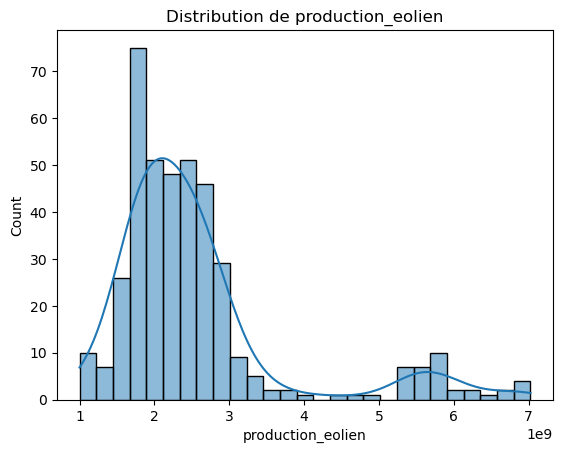

In [10]:
# Visualisation des colonnes d'intérêts
inter = [
    "consommation_totale", "production_totale", "temperature_reelle_lissee",
    "pseudo_rayonnement", "production_photovoltaique", "production_eolien"
]

for col in inter:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

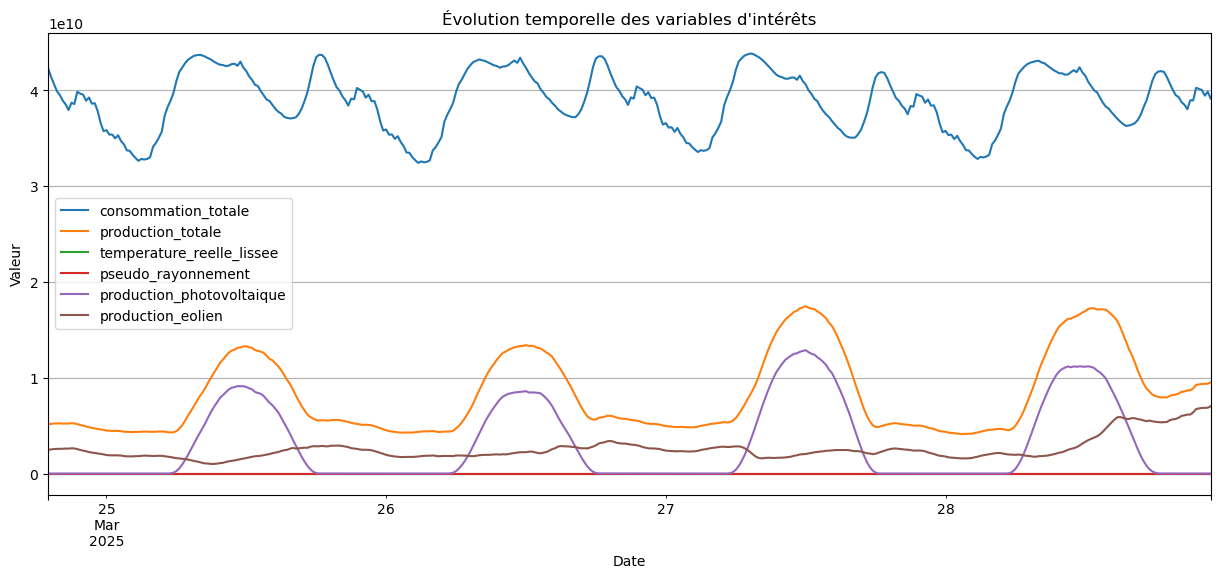

In [11]:
df.set_index("horodate")[inter].plot(figsize=(15, 6))
plt.title("Évolution temporelle des variables d'intérêts")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.grid(True)
plt.show()

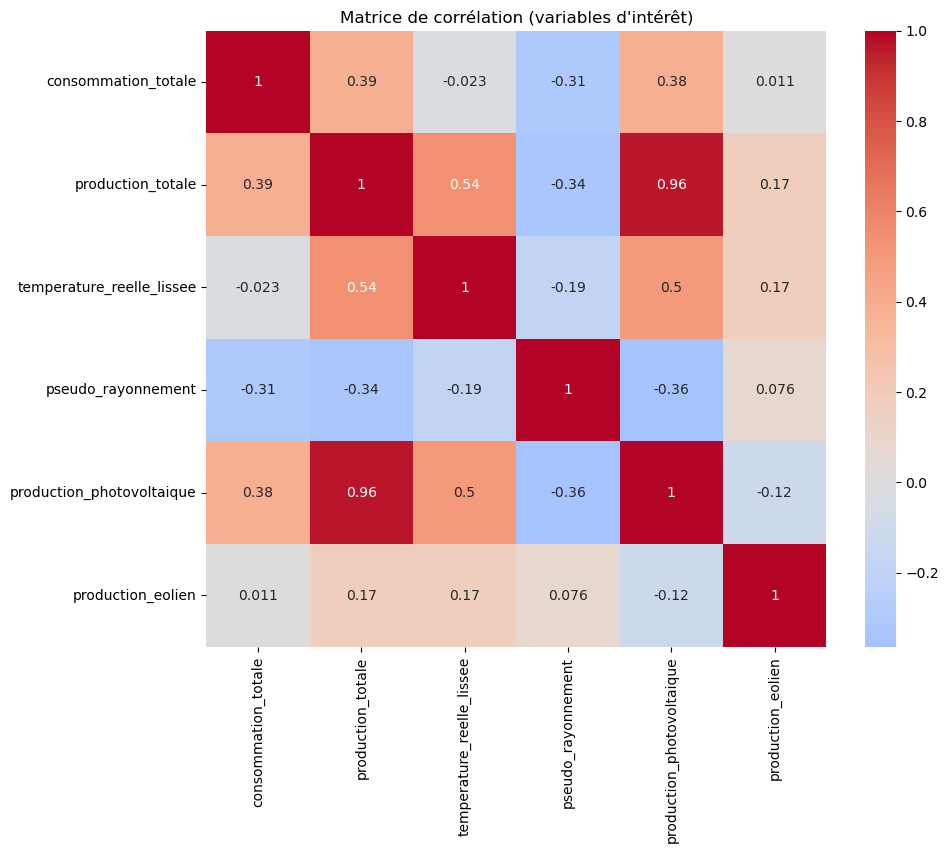

In [13]:
df_inter = df[inter]
corr = df_inter.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (variables d'intérêt)")
plt.show()